# Exercise 1
## Measure the speedup and efficiency for multiple problem and machine sizes as in previous exercises.

In [28]:
import csv
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [29]:
def getDataFor(path):
    with open(path) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=';')
        return [[int(row[0]),int(row[1]), float(row[2])] for row in csv_reader]

def chunk(it, size):
    it = iter(it)
    return list(iter(lambda: tuple(islice(it, size)), ()))


def sortData(list):
    a = []
    b = []
    c = []
    d = []
    for i in range(0,len(list),4):
        a = [list[i]] + a
        b = [list[i+1]] + b
        c = [list[i+2]] + c
        d = [list[i+3]] + d
    return [a,b,c,d]


#Vary the number of steps with const bodies=100
#Vary the number of bodies with const number of steps=10000
data = getDataFor('/home/chrise/git/uni/uibk_parsys_19/proseminar/09/nqueen/output_nqueen.dat')
data = sortData(data)
print(data)


[[[1, 8, 0.000260103], [2, 8, 0.000271015], [3, 8, 0.000360671], [4, 8, 0.000382657], [5, 8, 0.000421947], [6, 8, 0.000431312], [7, 8, 0.00318573], [8, 8, 0.00308364]], [[1, 12, 0.177365], [2, 12, 0.0899628], [3, 12, 0.0660729], [4, 12, 0.0496174], [5, 12, 0.0496588], [6, 12, 0.0350701], [7, 12, 0.0393186], [8, 12, 0.0443249]], [[1, 14, 7.51242], [2, 14, 3.80712], [3, 14, 3.02275], [4, 14, 2.43367], [5, 14, 1.86079], [6, 14, 1.79074], [7, 14, 1.2937], [8, 14, 1.29151]], [[1, 16, 397.794], [2, 16, 200.937], [3, 16, 144.168], [4, 16, 112.649], [5, 16, 90.7896], [6, 16, 87.4823], [7, 16, 81.6995], [8, 16, 59.8587]]]


### Speedup
- absolut: reference ts is the fastest sequential version
- relativ: reference ts is the fastest parallel version run sequentially
$$ speedup_p = \frac{t_s}{t_p} $$

### Efficency
$$ efficency = \frac{speedup_p}{p} $$

In [38]:
def plot2(ax1, data, title = "", typeOfGrahp=""):
    ax2 = ax1.twinx()
    for problemSize in range(0,4):

        cores = [ i[0] for i in data[problemSize] ]
        reference = data[problemSize][0][2]
        speedup = [ reference/i[2] for i in data[problemSize] ]
        efficency = [ speedup[i] / cores[i] for i in range(0,len(cores)) ]

        ax1.set_xlabel('number of processors')
        ax1.set_ylabel('Speedup')
        ax1.set_title(title)
        ax1.plot(cores, speedup, label="Speedup {}".format(data[problemSize][1][1]) +" "+ typeOfGrahp , marker='o',  linewidth=2)
        ax2.set_ylabel("Efficency")
        ax2.plot( cores, efficency, label="Efficency {}".format(data[problemSize][1][1]) +" "+ typeOfGrahp , marker='x', linewidth=2)
        ax1.legend(loc='lower left')
        ax2.legend()

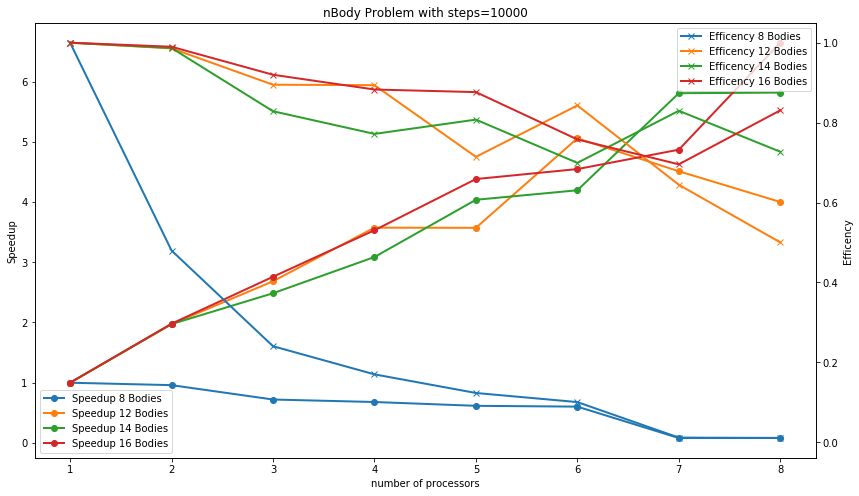

In [39]:
plt.rcParams["figure.figsize"] = (14,8)
fig, ax1 = plt.subplots(1,1)
plot2(ax1, data, "nBody Problem with steps=10000", "Bodies")
plt.show() 

Note: 
- All tests are done with MPI Version 3.1.1
- Time mesurements are done with the MPI function MPI_Wtime()